In [1]:
# import muspy

# emopia = muspy.EMOPIADataset("data/emopia/", download_and_extract=True)
# emopia.convert()
# music = emopia[0]
# print(music.annotations[0].annotation)

In [1]:
import os
from data.process_data import MidiEncoder, MIDIEncoderREMI
import pickle as pkl
from torch.utils.data import DataLoader
from data.dataset import TransformerDatasetREMI
import numpy as np
import glob
import torch
torch.manual_seed(0)

In [2]:
path_to_midi = "data/emopia/EMOPIA_2.2/midis/"

In [3]:
# Instantiate your MidiEncoder and MidiEncoderREMI
midi_files_list = [os.path.join(path_to_midi, file) for file in os.listdir(path_to_midi) if file.endswith(".mid")]
midi_encoder = MidiEncoder(steps_per_sec=100, num_vel_bins=32, min_pitch=21, max_pitch=108)
midi_encoder_remi = MIDIEncoderREMI(dict_path="data/encoder_dict.pkl", midi_files_list=midi_files_list)

In [4]:
encoded_sequences_path = "data/encoded_sequences.pkl"
encoded_sequences = midi_encoder.encode_midi_list(midi_files_list, pkl_path=encoded_sequences_path)

data/emopia/EMOPIA_2.2/midis/Q1_9v2WSpn4FCw_10.mid
0.03267407417297363
data/emopia/EMOPIA_2.2/midis/Q2_dtS02mrDMsM_1.mid
0.04438495635986328
data/emopia/EMOPIA_2.2/midis/Q3_3ZnxqCZ7qGg_0.mid
0.010029077529907227
data/emopia/EMOPIA_2.2/midis/Q4_vpTguZtJAFA_2.mid
0.021282196044921875
data/emopia/EMOPIA_2.2/midis/Q3_Ie5koh4qvJc_5.mid
0.01467442512512207
data/emopia/EMOPIA_2.2/midis/Q4_JP3QKZlyQz4_0.mid
0.010650634765625
data/emopia/EMOPIA_2.2/midis/Q1_Y5JcZQ0xg4Y_3.mid
0.03576493263244629
data/emopia/EMOPIA_2.2/midis/Q1_1Qc15G0ZHIg_3.mid
0.029140710830688477
data/emopia/EMOPIA_2.2/midis/Q1_ZgT7yq2jsBk_0.mid
0.02819538116455078
data/emopia/EMOPIA_2.2/midis/Q2_1kny88W533Q_4.mid
0.0304105281829834
data/emopia/EMOPIA_2.2/midis/Q3_xIsvaT20pZ0_1.mid
0.0209348201751709
data/emopia/EMOPIA_2.2/midis/Q2_k-FNDbK6Qhg_2.mid
0.1541440486907959
data/emopia/EMOPIA_2.2/midis/Q4_YAAxPW1GB7w_1.mid
0.01327371597290039
data/emopia/EMOPIA_2.2/midis/Q2_Q5b5unyP8BM_0.mid
0.03690671920776367
data/emopia/EMOPIA_2.

0.02319788932800293
data/emopia/EMOPIA_2.2/midis/Q4_f2b4kpdw7_c_1.mid
0.01906728744506836
data/emopia/EMOPIA_2.2/midis/Q4_oTi57hZfArE_1.mid
0.010872125625610352
data/emopia/EMOPIA_2.2/midis/Q2_0H4rq0L9OSw_0.mid
0.0477757453918457
data/emopia/EMOPIA_2.2/midis/Q1_ANZf1QXsNrY_3.mid
0.02422308921813965
data/emopia/EMOPIA_2.2/midis/Q2_l-4Kce3YxxQ_3.mid
0.03947329521179199
data/emopia/EMOPIA_2.2/midis/Q3_uj3Gif77SYM_2.mid
0.019085168838500977
data/emopia/EMOPIA_2.2/midis/Q2_1EDThWjNxOI_1.mid
0.013672590255737305
data/emopia/EMOPIA_2.2/midis/Q4_xrhWli_R98g_0.mid
0.020205974578857422
data/emopia/EMOPIA_2.2/midis/Q1_fey-8bOR95E_0.mid
0.03303861618041992
data/emopia/EMOPIA_2.2/midis/Q1_vv6nrZ2myXw_4.mid
0.022354841232299805
data/emopia/EMOPIA_2.2/midis/Q1_6Uf9XBUD3wE_0.mid
0.01603841781616211
data/emopia/EMOPIA_2.2/midis/Q3_zvWX_dwQPtU_0.mid
0.017418384552001953
data/emopia/EMOPIA_2.2/midis/Q2_38i12IPkL5c_2.mid
0.0343632698059082
data/emopia/EMOPIA_2.2/midis/Q2_ivCNV47tsRw_0.mid
0.03774428367614

In [5]:
# Now create the dataset and save it in a NumPy file
dataset_path = "data/datasets/"
midi_encoder_remi.save_dataset(midi_files_list, dataset_path)

In [6]:
# Save the dataset as a single file
single_file_dataset_path = "data/single_file_dataset.npz"
midi_encoder_remi.save_dataset_as_single_file(glob.glob(os.path.join(dataset_path, '*.npy')), single_file_dataset_path)

/home/codespace/venv/lib/python3.8/site-packages/numpy/lib/npyio.py:696: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


In [7]:
max_seq_len = 256
dataset = TransformerDatasetREMI(single_file_dataset_path, seq_len=max_seq_len)

/workspaces/ece661-final-proj2/data/dataset.py:170: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  self.sequences = torch.Tensor(self.sequences)


In [8]:
train_size = int(0.7 * len(dataset))
valid_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - valid_size
train_dataset, valid_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, valid_size, test_size])

In [9]:
print("Train dataset size: ", len(train_dataset))
print("Validation dataset size: ", len(valid_dataset))
print("Test dataset size: ", len(test_dataset))

Train dataset size:  3507
Validation dataset size:  751
Test dataset size:  753


In [10]:
from torch.utils.data import DataLoader
batch_size = 64

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False, drop_last=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, drop_last=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, drop_last=True)

print("Train dataset size: ", len(train_dataloader))
print("Validation dataset size: ", len(valid_dataloader))
print("Test dataset size: ", len(test_dataloader))

Train dataset size:  54
Validation dataset size:  11
Test dataset size:  11


In [11]:
for test in test_dataloader:
    print(test.keys())
    print(test['ids'][0])
    print(test['input'][0])
    # print(test['input_mask'])
    break

dict_keys(['ids', 'input', 'target', 'input_mask', 'target_mask'])
tensor([602])
tensor([ 40,  94,  24,   3,  53,  76,  19,   3,  17,  84,  64,   3,   7, 112,
         61,  49,  53,  76,  61,  81,  40,  74,  61,  81,  75, 112,  61,  81,
         73, 113,  61,   6,  56,  94,  15,   6,  73,  76, 166,  34,   7,  82,
        147,  34,  53,  25, 134,  34,   7, 112,  61,  20,  40, 112,  83,  20,
          7,  74, 134,  43,  10, 112,  52,  43,   7,  27,  50,  59,   7,  88,
        134,   2,   3,  44,  36, 127,   3,  10, 112,  61,   3,  37,  33, 127,
         81,  10, 112,  61,  81,   7,  27,  52,  81,  44,  25,  80,  12,   7,
        112,  64,  12,  17,  74,  52,  12,  53, 114,  64,  20,   7,  60,  72,
         20,  10,  82,  83,  43,  40,  29,  61,  43,  10,  74, 127,  59,   7,
         27, 137,  59,  53,  76, 127,  59,  42,  41,  61,   2,  49,  10,  84,
        137,  49,  40,  41,  64,  81,   7,  90,  64,  12,   7,  74,  50,  12,
          7,  28,  64,  12,   7,  41,  61,  20,  56,  41,  61

In [12]:
vocab_set = set()
for dic in train_dataset:
    ipt = dic['input'].numpy()
    vocab_set = vocab_set.union(set(ipt))
vocab_size = len(vocab_set)

In [13]:
from data.dataset import ClassifierDataset
classifier_dataset = ClassifierDataset(single_file_dataset_path, seq_len=max_seq_len, labels_path="data/emopia/EMOPIA_2.2/label.csv")

In [14]:
Q1, Q2, Q3, Q4 = [], [], [], []
for dic in classifier_dataset:
    label = dic['target']
    if label == 0:
        Q1.append(dic)
    elif label == 1:
        Q2.append(dic)
    elif label == 2:
        Q3.append(dic)
    elif label == 3:
        Q4.append(dic)

In [15]:
classifier_valid = {'Q1': Q1, 'Q2': Q2, 'Q3': Q3, 'Q4': Q4}

In [16]:
# from utils.trainer import TransformerTrainer
# from model.transformer import Generator, Discriminator, PatchDiscriminator
# from utils.losses import MultiCrossEntropyLoss, TransfoCrossEntropyLoss,TransfoL1Loss, wgan_loss

In [17]:
# generator = Generator(vocab_size, max_seq_len, dim=256)
# discriminator = Discriminator(vocab_size, max_seq_len, dim=256)
# patch_discriminator = PatchDiscriminator(vocab_size, max_seq_len, dim=256)

# ce_loss = TransfoCrossEntropyLoss()
# gan_loss = wgan_loss

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# generator.to(device)
# discriminator.to(device)
# patch_discriminator.to(device)

# g_lr = 1e-4
# d_lr = 1e-4

# EPOCHS = 10
# checkpoint_dir = "checkpoints/model.pt"

In [18]:
# trainer = TransformerTrainer(generator, patch_discriminator, train_dataloader, train_dataloader, test_dataloader, ce_loss,
#                gan_loss, device, g_lr, d_lr, vocab_size)

In [19]:
# hist = trainer.train( EPOCHS, checkpoint_dir, validate = False, log_interval=20, load=False, save=True, train_gan=False)

In [20]:
import math

import torch
from torch import nn, Tensor
from torch.nn import TransformerEncoder, TransformerEncoderLayer


In [21]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [22]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_seq_length, dropout=0.1):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)
        
        pe = torch.zeros(max_seq_length, d_model)
        position = torch.arange(0, max_seq_length, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model))
        
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        
        self.register_buffer('pe', pe.unsqueeze(0))
        
    def forward(self, x):
        x = x + self.pe[:, :x.size(1)]
        return self.dropout(x)

In [23]:
class TransformerModel(nn.Module):

    def __init__(self, max_seq_length: int, ntoken: int, d_model: int, nhead: int, d_hid: int,
                 nlayers: int, dropout: float = 0.5):
        super().__init__()
        self.model_type = 'Transformer'
        self.pos_encoder = PositionalEncoding(d_model, max_seq_length, dropout)
        encoder_layers = TransformerEncoderLayer(d_model, nhead, d_hid, dropout)
        self.transformer_encoder = TransformerEncoder(encoder_layers, nlayers)
        self.embedding = nn.Embedding(ntoken, d_model)
        self.d_model = d_model
        self.linear = nn.Linear(d_model, ntoken)

        self.init_weights()

    def init_weights(self) -> None:
        initrange = 0.1
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.linear.bias.data.zero_()
        self.linear.weight.data.uniform_(-initrange, initrange)

    def forward(self, src: Tensor, src_mask: Tensor = None) -> Tensor:
        src = self.embedding(src) * math.sqrt(self.d_model)
        src = self.pos_encoder(src)
        if src_mask is None:
            """Generate a square causal mask for the sequence. The masked positions are filled with float('-inf').
            Unmasked positions are filled with float(0.0).
            """
            src_mask = nn.Transformer.generate_square_subsequent_mask(len(src)).to(device)
            # Add padding mask if provided
        output = self.transformer_encoder(src, src_mask)
        output = self.linear(output)
        return output

In [24]:
ntokens = vocab_size  # size of vocabulary
emsize = 256  # embedding dimension
d_hid = 512  # dimension of the feedforward network model in ``nn.TransformerEncoder``
nlayers = 6  # number of ``nn.TransformerEncoderLayer`` in ``nn.TransformerEncoder``
nhead = 8  # number of heads in ``nn.MultiheadAttention``
dropout = 0.1  # dropout probability
max_seq_length = max_seq_len
model = TransformerModel(max_seq_len, ntokens, emsize, nhead, d_hid, nlayers, dropout).to(device)

/home/codespace/venv/lib/python3.8/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [25]:
print(model)

TransformerModel(
  (pos_encoder): PositionalEncoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-5): 6 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
        )
        (linear1): Linear(in_features=256, out_features=512, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=512, out_features=256, bias=True)
        (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (embedding): Embedding(198, 256)
  (linear): Linear(in_features=256, out_features=198, bias=True)
)


In [26]:
criterion = nn.CrossEntropyLoss()
lr = 0.001  # learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
epochs = 100  # The number of epochs

In [27]:
def early_stopping(val_loss, epoch,best_loss,epochs_no_improve, patience=10):
    if epoch == 0:
        torch.save(model.state_dict(), 'checkpoints/transformer_v3.pt')
        best_loss = val_loss
        epochs_no_improve = 0
        return False, best_loss, epochs_no_improve
    else:
        if val_loss < best_loss:
            torch.save(model.state_dict(), 'checkpoints/transformer_v3.pt')
            print(f"Saved model at epoch { epoch } with validation loss of {val_loss}")
            best_loss = val_loss
            epochs_no_improve = 0
            return False, best_loss, epochs_no_improve
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                print('Early stopping!')
                return True, best_loss, epochs_no_improve
            else:
                return False, best_loss, epochs_no_improve

In [28]:
# save the train valid losses for each epoch, and print them after epoch ends
best_loss = 50
epochs_no_improve = 0
train_losses = []
valid_losses = []



for epoch in range(epochs):
    model.train()
    train_loss = 0
    valid_loss = 0
    for batch in train_dataloader:
        src_data = batch['input'].to(device)
        tgt_data = batch['target'].to(device)
        optimizer.zero_grad()
        output = model(src_data)
        loss = criterion(output.view(-1, vocab_size), tgt_data.view(-1))
        loss.backward()
        optimizer.step()
        train_loss+=loss.item()
    train_losses.append(train_loss/len(train_dataloader))

    # evaluate on validation set
    model.eval()
    with torch.no_grad():
        for batch in valid_dataloader:
            src_data = batch['input'].to(device)
            tgt_data = batch['target'].to(device)
            output = model(src_data)
            loss = criterion(output.view(-1, vocab_size), tgt_data.view(-1))
            valid_loss+=loss.item()
            
    valid_losses.append(valid_loss/len(valid_dataloader))

    print("Epoch: [ {} / {} ]; TrainLoss: {:.5f}; ValidLoss: {:.5f}".format(
        epoch, epochs, train_loss/len(train_dataloader), valid_loss/len(valid_dataloader)
    ))


    cond, best_loss, epochs_no_improve = early_stopping(valid_loss/len(valid_dataloader), epoch, best_loss,epochs_no_improve, patience=10)
    if cond:
        break
    scheduler.step()
print("Training complete!")
print("Best loss: ", best_loss)

Epoch: [ 0 / 100 ]; TrainLoss: 3.93455; ValidLoss: 2.98324
Epoch: [ 1 / 100 ]; TrainLoss: 2.95194; ValidLoss: 2.94213
Saved model at epoch 1 with validation loss of 2.942125688899647
Epoch: [ 2 / 100 ]; TrainLoss: 2.92879; ValidLoss: 2.93443
Saved model at epoch 2 with validation loss of 2.9344312277707187
Epoch: [ 3 / 100 ]; TrainLoss: 2.92138; ValidLoss: 2.93046
Saved model at epoch 3 with validation loss of 2.9304559230804443
Epoch: [ 4 / 100 ]; TrainLoss: 2.91624; ValidLoss: 2.92786
Saved model at epoch 4 with validation loss of 2.927857594056563
Epoch: [ 5 / 100 ]; TrainLoss: 2.90325; ValidLoss: 2.91324
Saved model at epoch 5 with validation loss of 2.9132426218553023
Epoch: [ 6 / 100 ]; TrainLoss: 2.89989; ValidLoss: 2.91311
Saved model at epoch 6 with validation loss of 2.9131095192649146
Epoch: [ 7 / 100 ]; TrainLoss: 2.89920; ValidLoss: 2.91316
Epoch: [ 8 / 100 ]; TrainLoss: 2.89897; ValidLoss: 2.91324
Epoch: [ 9 / 100 ]; TrainLoss: 2.89802; ValidLoss: 2.91335
Epoch: [ 10 / 10

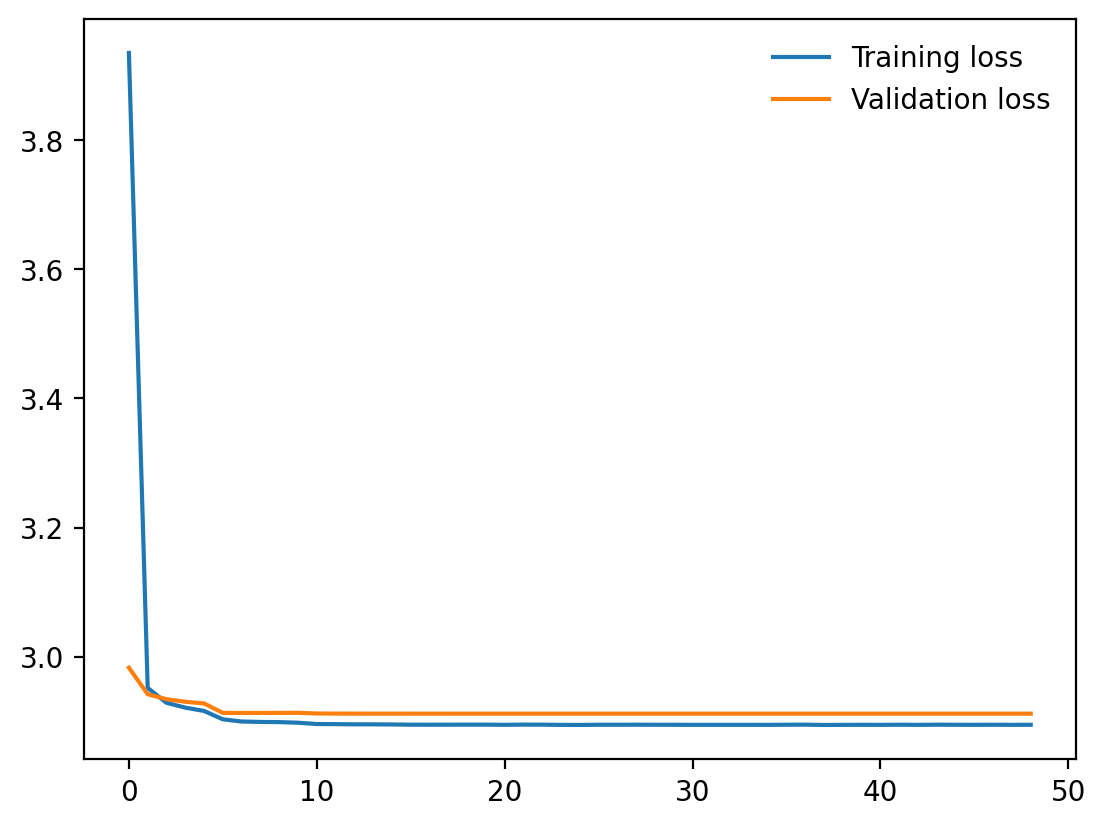

In [29]:
# plot losses
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' # Makes the plots clear on high-res screens
plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.legend(frameon=False)
plt.tight_layout
plt.show()

In [30]:
from torch.nn.functional import softmax

In [31]:
model = TransformerModel(max_seq_len, ntokens, emsize, nhead, d_hid, nlayers, dropout).to(device)
model.load_state_dict(torch.load("checkpoints/transformer_v3.pt"))

/home/codespace/venv/lib/python3.8/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


<All keys matched successfully>

In [ ]:
def pad_features(input, seq_length):
    # getting the correct rows x cols shape
    features = np.zeros((len(input), seq_length), dtype=int)

    # for each review, I grab that review and put it into features
    for i, row in enumerate(input):
        features[i, :len(row)] = np.array(row)[:seq_length]

    return features

In [ ]:
for batch in test_dataloader:
    data = batch['input'].to(device)
    print(data.shape)
    break

In [ ]:
max_length = 256
temperature = 1.0
end_token = 1

model.eval()
# current_token = start_token
generated_musics = []
original_musics = []

with torch.no_grad():
    for batch in test_dataloader:
        input = batch['input'].to(device)
        target = batch['target'].to(device)
        for i in range(len(input)):
            generated_tokens = [input[i][0]]
            output = model(input[i])
            # Apply temperature to the output probabilities for diversity
            probabilities = softmax(output.squeeze() / temperature, dim=-1)
            for j in range(max_length):
                current_token = torch.multinomial(probabilities[j], 1).item()
                # current_token = torch.argmax(probabilities[j]).item()
                if current_token == end_token:
                    break
                else:
                    generated_tokens.append(current_token)

            generated_musics.append(generated_tokens)
            original_musics.append(target[i].tolist())

In [ ]:
for i in range(len(generated_musics)):
    midi_encoder_remi.words_to_midi(generated_musics[i],f'generated_musics/transformer_1/transformer{i}.mid')
    midi_encoder_remi.words_to_midi(original_musics[i],f'generated_musics/original/original{i}.mid')

In [ ]:
max_length = 256
temperature = 1.0
end_token = 1

model.eval()
# current_token = start_token
generated_musics = {'Q1':[], 'Q2':[], 'Q3':[], 'Q4':[]}

with torch.no_grad():
    for c in classifier_valid.keys():
        print(c)
        for batch in classifier_valid[c]:
            input = batch['input'].to(device)
            target = batch['target'].to(device)
            generated_tokens = [input[0]]
            output = model(input)
            # Apply temperature to the output probabilities for diversity
            probabilities = softmax(output.squeeze() / temperature, dim=-1)
            for j in range(max_length):
                current_token = torch.multinomial(probabilities[j], 1).item()
                # current_token = torch.argmax(probabilities[j]).item()
                if current_token == end_token:
                    break
                else:
                    generated_tokens.append(current_token)

            generated_musics[c].append(generated_tokens)

In [ ]:
for c in generated_musics.keys():
    for i in range(len(generated_musics[c])):
        midi_encoder_remi.words_to_midi(generated_musics[c][i],f'generated_musics/transformer_1_by_emotion/{c}/transformer{i}.mid')

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import math
import copy

In [34]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"
        
        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads
        
        self.W_q = nn.Linear(d_model, d_model)
        self.W_k = nn.Linear(d_model, d_model)
        self.W_v = nn.Linear(d_model, d_model)
        self.W_o = nn.Linear(d_model, d_model)
        
    def scaled_dot_product_attention(self, Q, K, V, mask=None):
        attn_scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_k)
        if mask is not None:
            attn_scores = attn_scores.masked_fill(mask == 0, -1e9)
        attn_probs = torch.softmax(attn_scores, dim=-1)
        output = torch.matmul(attn_probs, V)
        return output
        
    def split_heads(self, x):
        batch_size, seq_length, d_model = x.size()
        return x.view(batch_size, seq_length, self.num_heads, self.d_k).transpose(1, 2)
        
    def combine_heads(self, x):
        batch_size, _, seq_length, d_k = x.size()
        return x.transpose(1, 2).contiguous().view(batch_size, seq_length, self.d_model)
        
    def forward(self, Q, K, V, mask=None):
        Q = self.split_heads(self.W_q(Q))
        K = self.split_heads(self.W_k(K))
        V = self.split_heads(self.W_v(V))
        
        attn_output = self.scaled_dot_product_attention(Q, K, V, mask)
        output = self.W_o(self.combine_heads(attn_output))
        return output

In [35]:
class PositionWiseFeedForward(nn.Module):
    def __init__(self, d_model, d_ff):
        super(PositionWiseFeedForward, self).__init__()
        self.fc1 = nn.Linear(d_model, d_ff)
        self.fc2 = nn.Linear(d_ff, d_model)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.fc2(self.relu(self.fc1(x)))

In [36]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_seq_length):
        super(PositionalEncoding, self).__init__()
        
        pe = torch.zeros(max_seq_length, d_model)
        position = torch.arange(0, max_seq_length, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model))
        
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        
        self.register_buffer('pe', pe.unsqueeze(0))
        
    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

In [37]:
class EncoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(EncoderLayer, self).__init__()
        self.self_attn = MultiHeadAttention(d_model, num_heads)
        self.feed_forward = PositionWiseFeedForward(d_model, d_ff)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x, mask):
        attn_output = self.self_attn(x, x, x, mask)
        x = self.norm1(x + self.dropout(attn_output))
        ff_output = self.feed_forward(x)
        x = self.norm2(x + self.dropout(ff_output))
        return x

In [38]:
class DecoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(DecoderLayer, self).__init__()
        self.self_attn = MultiHeadAttention(d_model, num_heads)
        self.cross_attn = MultiHeadAttention(d_model, num_heads)
        self.feed_forward = PositionWiseFeedForward(d_model, d_ff)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.norm3 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x, enc_output, src_mask, tgt_mask):
        attn_output = self.self_attn(x, x, x, tgt_mask)
        x = self.norm1(x + self.dropout(attn_output))
        attn_output = self.cross_attn(x, enc_output, enc_output, src_mask)
        x = self.norm2(x + self.dropout(attn_output))
        ff_output = self.feed_forward(x)
        x = self.norm3(x + self.dropout(ff_output))
        return x

In [39]:
class Transformer(nn.Module):
    def __init__(self, src_vocab_size, tgt_vocab_size, d_model, num_heads, num_layers, d_ff, max_seq_length, dropout):
        super(Transformer, self).__init__()
        self.encoder_embedding = nn.Embedding(src_vocab_size, d_model)
        self.decoder_embedding = nn.Embedding(tgt_vocab_size, d_model)
        self.positional_encoding = PositionalEncoding(d_model, max_seq_length)

        self.encoder_layers = nn.ModuleList([EncoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])
        self.decoder_layers = nn.ModuleList([DecoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])

        self.fc = nn.Linear(d_model, tgt_vocab_size)
        self.dropout = nn.Dropout(dropout)

    def generate_mask(self, src, tgt):
        src_mask = (src != 0).unsqueeze(1).unsqueeze(2)
        tgt_mask = (tgt != 0).unsqueeze(1).unsqueeze(3)
        seq_length = tgt.size(1)
        nopeak_mask = (1 - torch.triu(torch.ones(1, seq_length, seq_length), diagonal=1)).bool().to(device)
        tgt_mask = tgt_mask & nopeak_mask
        return src_mask, tgt_mask

    def forward(self, src, tgt):
        src_mask, tgt_mask = self.generate_mask(src, tgt)
        src_embedded = self.dropout(self.positional_encoding(self.encoder_embedding(src)))
        tgt_embedded = self.dropout(self.positional_encoding(self.decoder_embedding(tgt)))

        enc_output = src_embedded
        for enc_layer in self.encoder_layers:
            enc_output = enc_layer(enc_output, src_mask)

        dec_output = tgt_embedded
        for dec_layer in self.decoder_layers:
            dec_output = dec_layer(dec_output, enc_output, src_mask, tgt_mask)

        output = self.fc(dec_output)
        return output

In [40]:
src_vocab_size = vocab_size
tgt_vocab_size = vocab_size
d_model = 512
num_heads = 8
num_layers = 6
d_ff = 256
max_seq_length = max_seq_len
dropout = 0.2
epochs = 100

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transformer = Transformer(src_vocab_size, tgt_vocab_size, d_model, num_heads, num_layers, d_ff, max_seq_length, dropout)
transformer.to(device)

Transformer(
  (encoder_embedding): Embedding(198, 512)
  (decoder_embedding): Embedding(198, 512)
  (positional_encoding): PositionalEncoding()
  (encoder_layers): ModuleList(
    (0-5): 6 x EncoderLayer(
      (self_attn): MultiHeadAttention(
        (W_q): Linear(in_features=512, out_features=512, bias=True)
        (W_k): Linear(in_features=512, out_features=512, bias=True)
        (W_v): Linear(in_features=512, out_features=512, bias=True)
        (W_o): Linear(in_features=512, out_features=512, bias=True)
      )
      (feed_forward): PositionWiseFeedForward(
        (fc1): Linear(in_features=512, out_features=256, bias=True)
        (fc2): Linear(in_features=256, out_features=512, bias=True)
        (relu): ReLU()
      )
      (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.2, inplace=False)
    )
  )
  (decoder_layers): ModuleList(
    (0-5): 6 x DecoderLayer(
     

In [41]:
def early_stopping(val_loss, epoch,best_loss,epochs_no_improve, patience=10, checkpoint_dir="checkpoints/transformer.pt"):
    if epoch == 0:
        torch.save(transformer.state_dict(), 'checkpoints/transformer_v3.pt')
        best_loss = val_loss
        epochs_no_improve = 0
        return False, best_loss, epochs_no_improve
    else:
        if val_loss < best_loss:
            torch.save(transformer.state_dict(), checkpoint_dir)
            print(f"Saved model at epoch { epoch } with validation loss of {val_loss}")
            best_loss = val_loss
            epochs_no_improve = 0
            return False, best_loss, epochs_no_improve
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                print('Early stopping!')
                return True, best_loss, epochs_no_improve
            else:
                return False, best_loss, epochs_no_improve

In [42]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(transformer.parameters(), lr=0.0001, betas=(0.9, 0.98), eps=1e-9)

best_loss = 50
epochs_no_improve = 0

# save the train valid losses for each epoch, and print them after epoch ends

train_losses = []
valid_losses = []


for epoch in range(epochs):
    transformer.train()
    train_loss = 0
    valid_loss = 0
    for batch in train_dataloader:
        src_data = batch['input'].to(device)
        tgt_data = batch['target'].to(device)
        optimizer.zero_grad()
        output = transformer(src_data, tgt_data[:, :-1])
        loss = criterion(output.contiguous().view(-1, tgt_vocab_size), tgt_data[:, 1:].contiguous().view(-1))
        loss.backward()
        optimizer.step()
        train_loss+=loss.item()
    train_losses.append(train_loss/len(train_dataloader))

    # evaluate on validation set
    transformer.eval()
    with torch.no_grad():
        for batch in valid_dataloader:
            src_data = batch['input'].to(device)
            tgt_data = batch['target'].to(device)
            output = transformer(src_data, tgt_data[:, :-1])
            loss = criterion(output.contiguous().view(-1, tgt_vocab_size), tgt_data[:, 1:].contiguous().view(-1))
            valid_loss+=loss.item()
            
    valid_losses.append(valid_loss/len(valid_dataloader))

    print("Epoch: [ {} / {} ]; TrainLoss: {:.5f}; ValidLoss: {:.5f}".format(
        epoch, epochs, train_loss/len(train_dataloader), valid_loss/len(valid_dataloader)
    ))

    # if epoch>=10:
    #     if valid_loss < best_loss:
    #         best_loss = valid_loss
    #         print("Saving...")
    #         torch.save(transformer.state_dict(), "checkpoints/transformer.pt")
    #         print("Model saved!")
    # early stopping
    cond, best_loss, epochs_no_improve = early_stopping(valid_loss/len(valid_dataloader), epoch, best_loss,epochs_no_improve, patience=10)
    if cond:
        break

print("Training complete!")
print("Best loss: ", best_loss)

Epoch: [ 0 / 100 ]; TrainLoss: 4.08579; ValidLoss: 3.33072
Epoch: [ 1 / 100 ]; TrainLoss: 2.89704; ValidLoss: 2.58892
Saved model at epoch 1 with validation loss of 2.588922478935935
Epoch: [ 2 / 100 ]; TrainLoss: 2.42888; ValidLoss: 2.17449
Saved model at epoch 2 with validation loss of 2.174491145394065
Epoch: [ 3 / 100 ]; TrainLoss: 2.12409; ValidLoss: 1.97018
Saved model at epoch 3 with validation loss of 1.970175949009982
Epoch: [ 4 / 100 ]; TrainLoss: 1.91861; ValidLoss: 1.75791
Saved model at epoch 4 with validation loss of 1.7579066645015369
Epoch: [ 5 / 100 ]; TrainLoss: 1.74842; ValidLoss: 1.60031
Saved model at epoch 5 with validation loss of 1.6003079631111838
Epoch: [ 6 / 100 ]; TrainLoss: 1.62358; ValidLoss: 1.45099
Saved model at epoch 6 with validation loss of 1.4509866129268298
Epoch: [ 7 / 100 ]; TrainLoss: 1.49694; ValidLoss: 1.30291
Saved model at epoch 7 with validation loss of 1.3029079870744185
Epoch: [ 8 / 100 ]; TrainLoss: 1.37773; ValidLoss: 1.16068
Saved mode

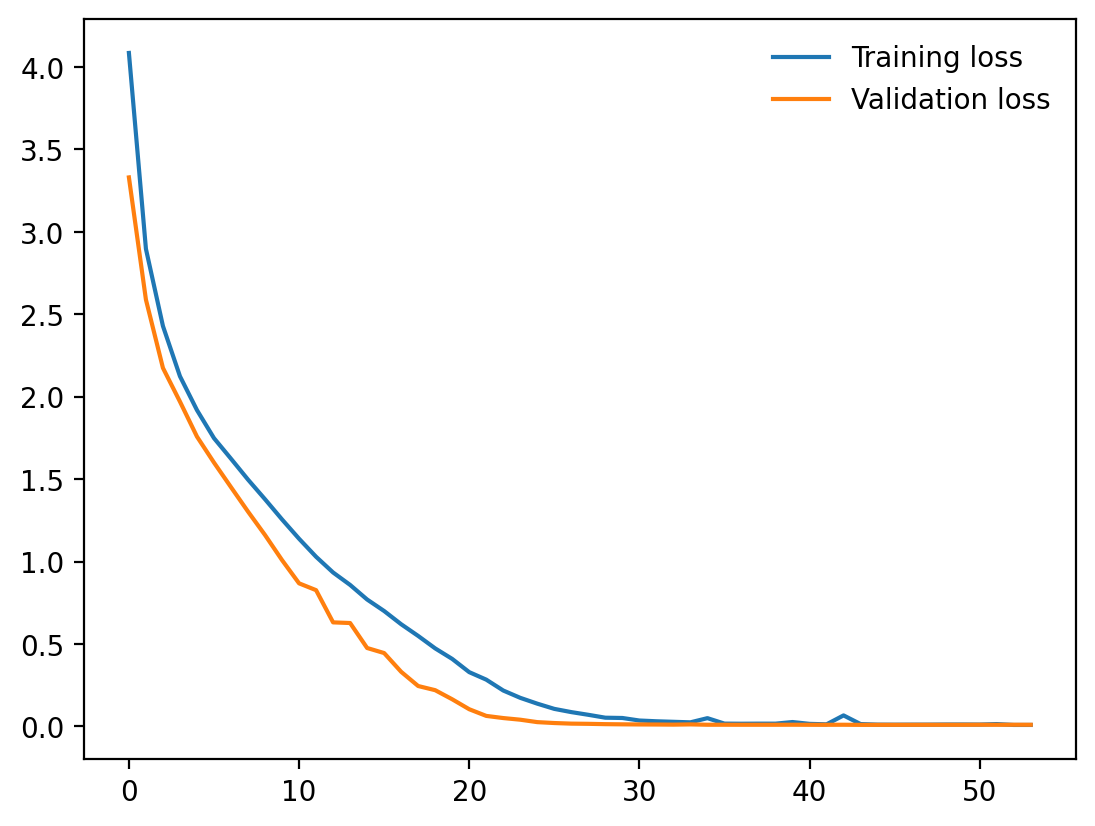

In [43]:
# plot losses
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' # Makes the plots clear on high-res screens
plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.legend(frameon=False)
plt.tight_layout
plt.show()

In [34]:
vocab_size

198

In [29]:
# generate a sequence from the transformer model using test dataloader from the best model
transformer = Transformer(src_vocab_size, tgt_vocab_size, d_model, num_heads, num_layers, d_ff, max_seq_length, dropout)
transformer.to(device)
transformer.load_state_dict(torch.load("checkpoints/transformer.pt"))

<All keys matched successfully>

In [47]:
from torch.nn.functional import softmax

In [32]:
max_length = 256
temperature = 1.0
end_token = 1

transformer.eval()
# current_token = start_token
generated_musics = []
original_musics = []

with torch.no_grad():
    for batch in test_dataloader:
        input = batch['input'].to(device)
        target = batch['target'].to(device)
        for i in range(len(input)):
            generated_tokens = []
            output = transformer(input[i].unsqueeze(0), target[i].unsqueeze(0))
            # Apply temperature to the output probabilities for diversity
            probabilities = softmax(output.squeeze() / temperature, dim=-1)

            for j in range(max_length):
                current_token = torch.multinomial(probabilities[j], 1).item()
                generated_tokens.append(current_token)

                if current_token == end_token:
                    break
                if len(generated_tokens) == max_length:
                    break
            generated_musics.append(generated_tokens)
            original_musics.append(target[i].tolist())

In [36]:
for i in range(len(generated_musics)):
    midi_encoder_remi.words_to_midi(generated_musics[i],f'generated_musics/transformer_2/transformer{i}.mid')
    # midi_encoder_remi.words_to_midi(original_musics[i],f'generated_musics/original/original{i}.mid')

In [57]:
max_length = 256
temperature = 1.0
end_token = 1

transformer.eval()
# current_token = start_token
generated_musics = {'Q1':[], 'Q2':[], 'Q3':[], 'Q4':[]}

with torch.no_grad():
    for c in classifier_valid.keys():
        print(c)
        for batch in classifier_valid[c]:
            input = batch['input'].to(device)
            target = torch.cat((input[1:], torch.tensor([0],dtype=torch.long).to(device)))
            generated_tokens = [input[0]]

            # for i in range(len(input)):
            generated_tokens = []
            output = transformer(input.unsqueeze(0), target.unsqueeze(0))
            # Apply temperature to the output probabilities for diversity
            probabilities = softmax(output.squeeze() / temperature, dim=-1)

            for j in range(max_length):
                current_token = torch.multinomial(probabilities[j], 1).item()

                if current_token == end_token:
                    break
                else:
                    generated_tokens.append(current_token)
            generated_musics[c].append(generated_tokens)

Q1
Q2
Q3
Q4


In [58]:
for c in generated_musics.keys():
    for i in range(len(generated_musics[c])):
        midi_encoder_remi.words_to_midi(generated_musics[c][i],f'generated_musics/transformer_2_by_emotion/{c}/transformer{i}.mid')

In [ ]:
import os

dir_name = "generated_musics/transformer"
test = os.listdir(dir_name)

for item in test:
    if item.endswith(".mid"):
        os.remove(os.path.join(dir_name, item))

dir_name = "generated_musics/original"
test = os.listdir(dir_name)

for item in test:
    if item.endswith(".mid"):
        os.remove(os.path.join(dir_name, item))

# GAN

In [26]:
# build a generator
class Generator(nn.Module):
    def __init__(self, vocab_size, max_seq_len, emsize, d_hid, nhead, nlayers, dropout):
        super(Generator, self).__init__()
        # TransformerModel(max_seq_len, ntokens, emsize, nhead, d_hid, nlayers, dropout).to(device)
        self.transformer = TransformerModel(max_seq_len, vocab_size, emsize, nhead, d_hid, nlayers, dropout)
        # self.fc = nn.Linear(dim, vocab_size)
        
    def forward(self, src):
        output = self.transformer(src)
        return output

In [27]:
class TransformerModel_classifier(nn.Module):

    def __init__(self, max_seq_length: int, ntoken: int, d_model: int, nhead: int, d_hid: int,
                 nlayers: int, dropout: float = 0.5, num_classes=1):
        super().__init__()
        self.pos_encoder = PositionalEncoding(d_model, max_seq_length, dropout)
        encoder_layers = TransformerEncoderLayer(d_model, nhead, d_hid, dropout)
        self.transformer_encoder = TransformerEncoder(encoder_layers, nlayers)
        self.embedding = nn.Embedding(ntoken, d_model)
        self.d_model = d_model
        self.linear = nn.Linear(d_model, ntoken)
        self.fc = nn.Linear(d_model, num_classes)
        self.sigmoid = nn.Sigmoid()
        self.init_weights()

    def init_weights(self) -> None:
        initrange = 0.1
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.linear.bias.data.zero_()
        self.linear.weight.data.uniform_(-initrange, initrange)

    def forward(self, src: Tensor, src_mask: Tensor = None) -> Tensor:
        src = self.embedding(src) * math.sqrt(self.d_model)
        src = self.pos_encoder(src)
        # if src_mask is None:
        #     """Generate a square causal mask for the sequence. The masked positions are filled with float('-inf').
        #     Unmasked positions are filled with float(0.0).
        #     """
        #     src_mask = nn.Transformer.generate_square_subsequent_mask(len(src)).to(device)
        output = self.transformer_encoder(src)
        output,_ = torch.max(output, dim=1)              # x has shape (Batch, Embd_dim)
        output = self.fc(output)
        output = self.sigmoid(output)
        return output

In [28]:
# build a discriminator
class Discriminator(nn.Module):
    def __init__(self, vocab_size, max_seq_len, emsize, d_hid, nhead, nlayers, dropout):
        super(Discriminator, self).__init__()
        self.transformer = TransformerModel_classifier(max_seq_len, vocab_size, emsize, nhead, d_hid, nlayers, dropout)

    def forward(self, src):
        output = self.transformer(src)
        return output

In [29]:
# Create the generator

netG = Generator(vocab_size, max_seq_len, emsize, d_hid, nhead, nlayers, dropout).to(device)
# Create the Discriminator
netD = Discriminator(vocab_size, max_seq_len, emsize, d_hid, nhead, nlayers, dropout).to(device)

# Initialize the ``BCELoss`` function
criterion_BCE = nn.BCELoss()

criterion_ce = nn.CrossEntropyLoss()

# Create batch of latent vectors that we will use to visualize
#  the progression of the generator
nz = 100
fixed_noise = torch.randn(64, nz, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = 1.
fake_label = 0.

lr = 0.0002
beta1 = 0.5

# Setup Adam optimizers for both G and D
optimizerD = torch.optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = torch.optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

In [30]:
num_epochs = 5
temperature = 1.0

In [31]:
# Training Loop
# Lists to keep track of progress
txt_list = []
G_losses = []
D_losses = []
iters = 0


print("Starting Training Loop...")
# For each epoch
for epoch in range(num_epochs):
    # For each batch in the dataloader
    for k, data in enumerate(train_dataloader):
        input = data['input']
        target = data['target'].to(device)
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        netD.zero_grad()
        # Format batch
        real_cpu = input.to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
        # Forward pass real batch through D
        output = netD(real_cpu).view(-1)
        # Calculate loss on all-real batch
        errD_real = criterion_BCE(output, label)
        # Calculate gradients for D in backward pass
        errD_real.backward()
        D_x = output.mean().item()

        ## Train with all-fake batch
        # Generate batch of latent vectors
        # noise = torch.randn(b_size, nz, 1, 1, device=device)
        # Generate fake image batch with G
        fake = netG(real_cpu)
        fake_probabilities = softmax(fake.squeeze() / temperature, dim=-1)
        fake_mat = torch.zeros((b_size, max_seq_length), dtype=torch.long).to(device)
        for i in range(b_size):
            for j in range(max_seq_length):
                fake_mat[i][j] = torch.multinomial(fake_probabilities[i][j], 1).item()
        
        label.fill_(fake_label)
        # Classify all fake batch with D
        output = netD(fake_mat).view(-1)
        # Calculate D's loss on the all-fake batch
        errD_fake = criterion_BCE(output, label)
        # Calculate the gradients for this batch, accumulated (summed) with previous gradients
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        # Compute error of D as sum over the fake and the real batches
        errD = errD_real + errD_fake
        # Update D
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        # output = netD(fake_mat).view(-1)
        # Calculate G's loss based on this output
        # errG = criterion(output, label)
        errG = criterion_ce(fake.view(-1, vocab_size), target.view(-1))
        # Calculate gradients for G
        errG.backward()
        D_G_z2 = output.mean().item()
        # Update G
        optimizerG.step()

        # Output training stats
        if k % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(train_dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        # Check how the generator is doing by saving G's output on fixed_noise
        if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(train_dataloader)-1)):
            with torch.no_grad():
                fake = netG(real_cpu).detach().cpu()
            fake_probabilities = softmax(fake.squeeze() / temperature, dim=-1)
            fake_mat = torch.zeros((b_size, max_seq_length), dtype=torch.long).to(device)
            for i in range(b_size):
                for j in range(max_seq_length):
                    fake_mat[i][j] = torch.multinomial(fake_probabilities[i][j], 1).item()
            txt_list.append(fake_mat)

        iters += 1

Starting Training Loop...
[0/5][63/54]	Loss_D: 1.5515	Loss_G: 5.6418	D(x): 0.7517	D(G(z)): 0.7159 / 0.7159
[0/5][63/54]	Loss_D: 0.0364	Loss_G: 3.1777	D(x): 0.9807	D(G(z)): 0.0168 / 0.0168
[1/5][63/54]	Loss_D: 0.0229	Loss_G: 3.1077	D(x): 0.9906	D(G(z)): 0.0134 / 0.0134
[1/5][63/54]	Loss_D: 0.0824	Loss_G: 2.9925	D(x): 0.9519	D(G(z)): 0.0326 / 0.0326
[2/5][63/54]	Loss_D: 0.0695	Loss_G: 2.9593	D(x): 0.9766	D(G(z)): 0.0447 / 0.0447
[2/5][63/54]	Loss_D: 0.0316	Loss_G: 2.9662	D(x): 0.9797	D(G(z)): 0.0110 / 0.0110
[3/5][63/54]	Loss_D: 0.0208	Loss_G: 2.9278	D(x): 0.9939	D(G(z)): 0.0146 / 0.0146
[3/5][63/54]	Loss_D: 0.0103	Loss_G: 2.9537	D(x): 0.9937	D(G(z)): 0.0040 / 0.0040
[4/5][63/54]	Loss_D: 0.0084	Loss_G: 2.9120	D(x): 0.9977	D(G(z)): 0.0060 / 0.0060
[4/5][63/54]	Loss_D: 0.0059	Loss_G: 2.9447	D(x): 0.9966	D(G(z)): 0.0025 / 0.0025


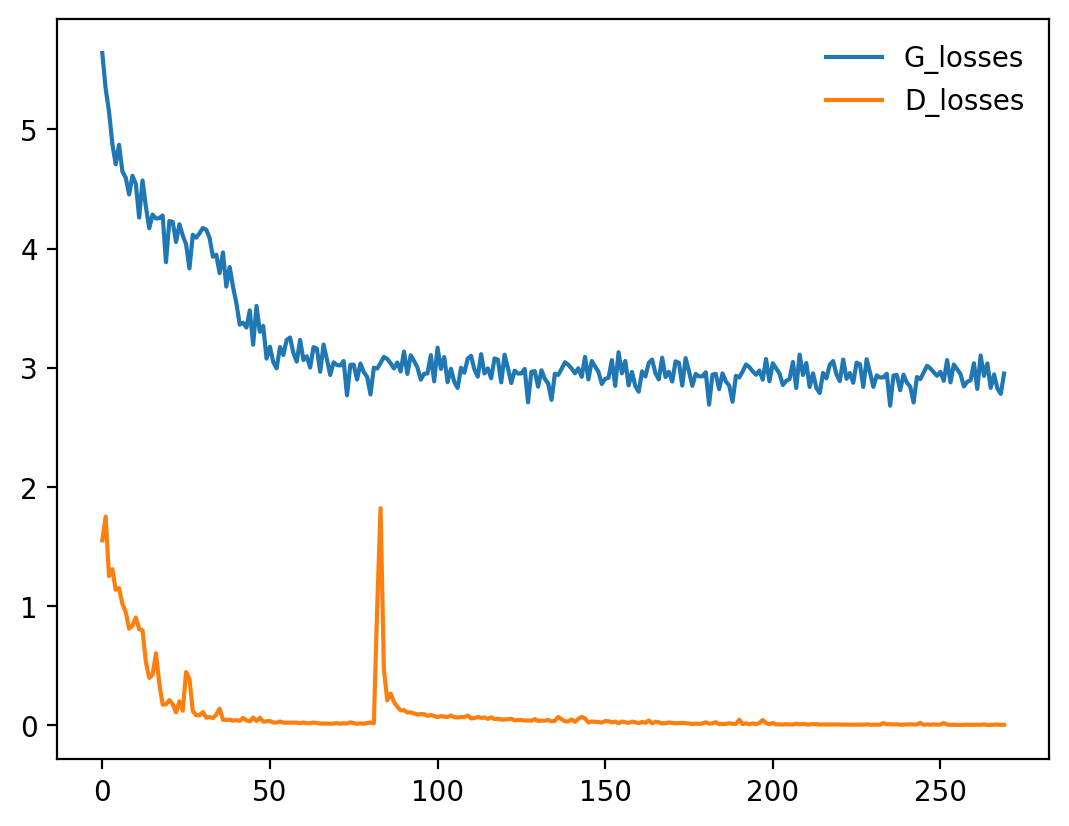

In [32]:
# plot losses
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' # Makes the plots clear on high-res screens
plt.plot(G_losses, label='G_losses')
plt.plot(D_losses, label='D_losses')
plt.legend(frameon=False)
plt.tight_layout
plt.show()

In [33]:
torch.save(netG.state_dict(), "checkpoints/generator.pt")

In [34]:
max_length = 256
temperature = 1.0
end_token = 1

model.eval()
# current_token = start_token
generated_musics = []
original_musics = []

with torch.no_grad():
    for batch in test_dataloader:
        input = batch['input'].to(device)
        target = batch['target'].to(device)
        for i in range(len(input)):
            generated_tokens = []
            output = netG(input[i])
            # Apply temperature to the output probabilities for diversity
            probabilities = softmax(output.squeeze() / temperature, dim=-1)
            for j in range(max_length):
                current_token = torch.multinomial(probabilities[j], 1).item()
                # current_token = torch.argmax(probabilities[j]).item()
                generated_tokens.append(current_token)

                if current_token == end_token:
                    break
            generated_musics.append(generated_tokens)
            # original_musics.append(target[i].tolist())

In [35]:
for i in range(len(generated_musics)):
    midi_encoder_remi.words_to_midi(generated_musics[i],f'generated_musics/gan/gan{i}.mid')
    # midi_encoder_remi.words_to_midi(original_musics[i],f'generated_musics/original/original{i}.mid')

In [36]:
max_length = 256
temperature = 1.0
end_token = 1

model.eval()
# current_token = start_token
generated_musics = {'Q1':[], 'Q2':[], 'Q3':[], 'Q4':[]}

with torch.no_grad():
    for c in classifier_valid.keys():
        print(c)
        for batch in classifier_valid[c]:
            input = batch['input'].to(device)
            target = batch['target'].to(device)
            generated_tokens = [input[0]]
            output = netG(input)
            # Apply temperature to the output probabilities for diversity
            probabilities = softmax(output.squeeze() / temperature, dim=-1)
            for j in range(max_length):
                current_token = torch.multinomial(probabilities[j], 1).item()
                # current_token = torch.argmax(probabilities[j]).item()
                if current_token == end_token:
                    break
                else:
                    generated_tokens.append(current_token)

            generated_musics[c].append(generated_tokens)

Q1
Q2
Q3
Q4


In [ ]:
for c in generated_musics.keys():
    for i in range(len(generated_musics[c])):
        midi_encoder_remi.words_to_midi(generated_musics[c][i],f'generated_musics/gan_by_emotion/{c}/transformer{i}.mid')